In [12]:
import pandas as pd
import os
import re
import csv
import math
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline


In [13]:

filename1 = 'hw2_data.csv'
df_train = pd.read_csv(filename1)



## Part 2

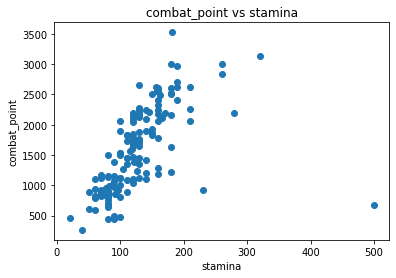

0.5828317032229264


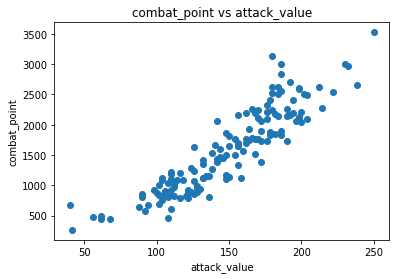

0.9075315401042738


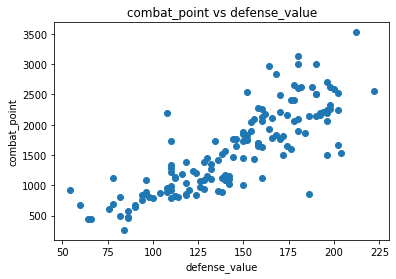

0.8262293053572933


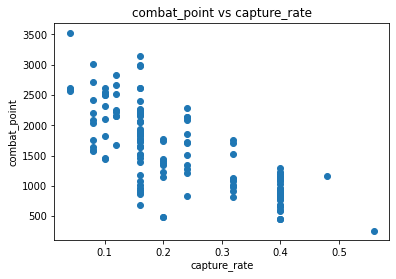

-0.7430078083529389


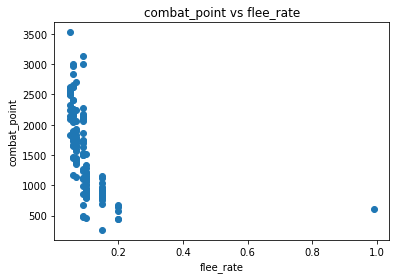

-0.40703421142159657


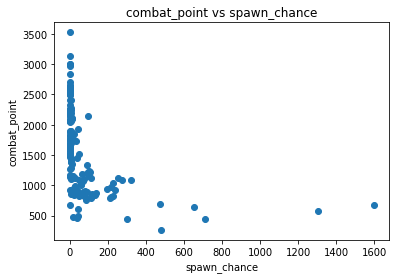

-0.42132699465983625


In [14]:
# combat_point is outcome variable

features = list(df_train.columns.values)
features.remove('name')
features.remove('primary_strength')


for feature in features:
    if feature != 'combat_point':
        x = df_train[feature]
        y = df_train['combat_point']
        plt.xlabel(feature)
        plt.ylabel('combat_point')
        plt.scatter(x,y)
        plt.title('combat_point vs '+ feature)
        plt.show()
        print(x.corr(y))

    


# for feature1 in features:
#     for feature2 in features[i+1:]:
#         if feature1=='class' or feature2=='class':
#             continue
#         else:
#             x = df_train[feature1]
#             y = df_train[feature2]
#             p = df_train['class']
#             plt.xlabel(feature1)
#             plt.ylabel(feature2)
#             plt.scatter( x = df_train[feature1],y=df_train[feature2],color=color)
#             plt.show()
#     i+=1

## Part 3

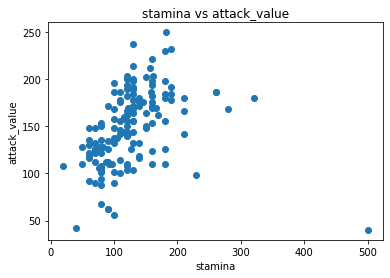

0.3029949826738915


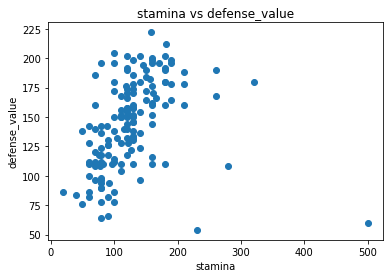

0.3026633362536891


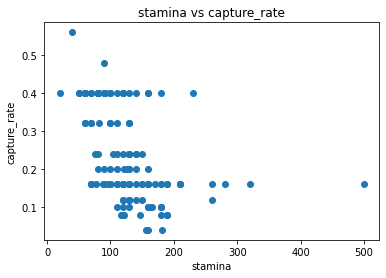

-0.4468503047144595


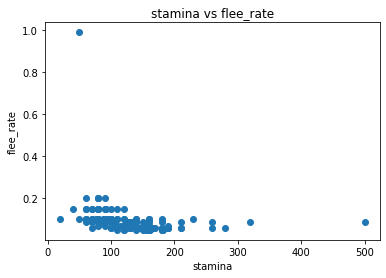

-0.27104753932483927


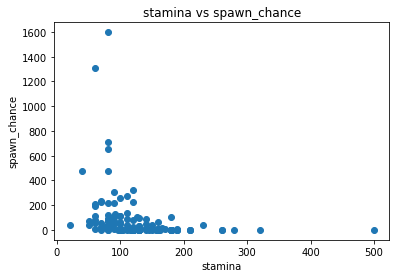

-0.27642020788360366


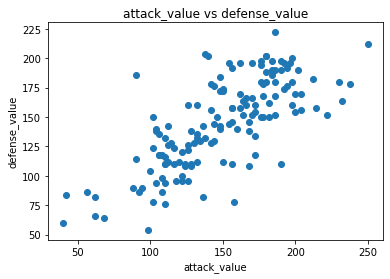

0.7367766467515232


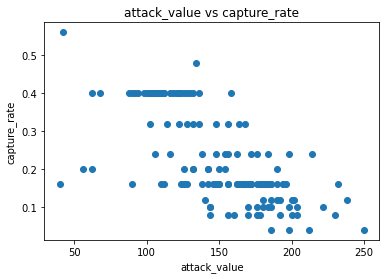

-0.6905726716022129


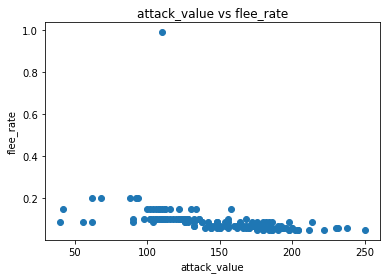

-0.3690641419760069


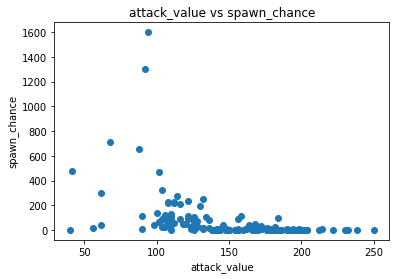

-0.43264844020108706


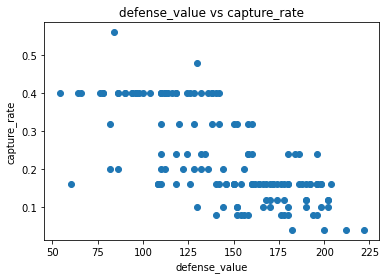

-0.6972657162131638


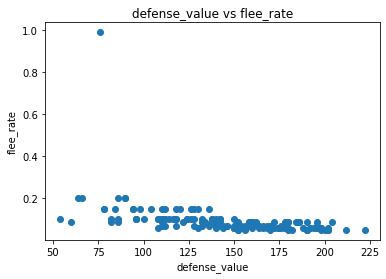

-0.423859756237293


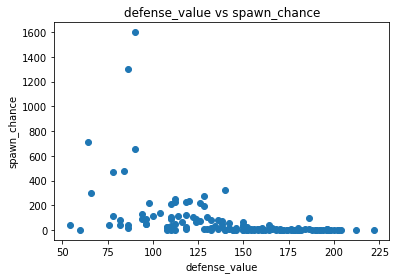

-0.4324985620833201


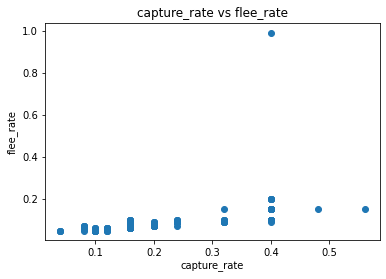

0.4405115072805946


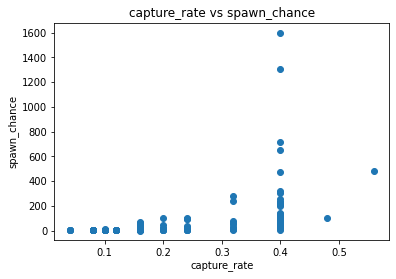

0.47279272664456745


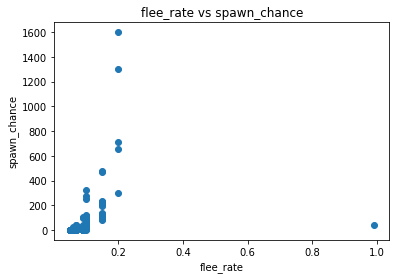

0.29322169222082045


In [15]:
features = list(df_train.columns.values)
features.remove('name')
features.remove('primary_strength')
features.remove('combat_point')
i=0

for feature1 in features:
    for feature2 in features[i+1:]:
        if feature1==feature2:
            continue
        else:
            x = df_train[feature1]
            y = df_train[feature2]
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title("{} vs {}".format(feature1,feature2))
            plt.scatter( x = df_train[feature1],y=df_train[feature2])
            plt.show()
            print(x.corr(y))

    i+=1


## Part 4 - one hot encoding

In [16]:
strength_categories = df_train['primary_strength'].unique()
print(strength_categories)
print(len(strength_categories))
for i in strength_categories:
    df_train[i] = np.where(df_train['primary_strength']==i, 1, 0) 
display(df_train)    
    


['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon']
15


,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength,combat_point,Grass,...,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon
0,Bulbasaur,90,126,126,0.16,0.10,69.00,Grass,1079,1,...,0,0,0,0,0,0,0,0,0,0
1,Ivysaur,120,156,158,0.08,0.07,4.20,Grass,1643,1,...,0,0,0,0,0,0,0,0,0,0
2,Venusaur,160,198,200,0.04,0.05,1.70,Grass,2598,1,...,0,0,0,0,0,0,0,0,0,0
3,Charmander,78,128,108,0.16,0.10,25.30,Fire,962,0,...,0,0,0,0,0,0,0,0,0,0
4,Charmeleon,116,160,140,0.08,0.07,1.20,Fire,1568,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Aerodactyl,160,182,162,0.16,0.09,1.80,Rock,2180,0,...,0,0,0,0,0,0,1,0,0,0
142,Snorlax,320,180,180,0.16,0.09,1.60,Normal,3135,0,...,0,0,0,0,0,0,0,0,0,0
143,Dratini,82,128,110,0.32,0.09,30.00,Dragon,990,0,...,0,0,0,0,0,0,0,0,0,1
144,Dragonair,122,170,152,0.08,0.06,2.00,Dragon,1760,0,...,0,0,0,0,0,0,0,0,0,1


## Part 5

In [17]:
df = pd.DataFrame()
sum = 0
df = df_train
df = df.drop(['name', 'primary_strength'], axis = 1)  
# How many features does the datasetmodel have
print('Because the total number of column names are {}. The model will have {} parameters(w*) because one column name is the combat_point '.format(len(df.columns.values),len(df.columns.values)-1))
constant = 1
df.insert(loc=0, column='constant', value=constant)
start = 0   
end = 29

#randomize the sample
df = df.sample(frac = 1)    
# create 5- fold cross-validation
for i in range(1,6):
    test_data= pd.DataFrame()
    test_y = pd.DataFrame()
    test_x = pd.DataFrame()
    train_data = pd.DataFrame()
    train_y = pd.DataFrame()
    train_x = pd.DataFrame()
    print("This is Iteration {}".format(i))

    #get test data
    test_data = df[start:end]
    test_y['combat_point'] = test_data['combat_point'] 
    test_x = test_data.drop('combat_point',axis=1)
    #get train data
    train_data = df.drop(list(test_data.index.values))
    train_y['combat_point'] = train_data['combat_point'] 
    train_x = train_data.drop('combat_point',axis=1) 
    # dot product to get w*
    xtx= np.dot(train_x.transpose(),train_x) 
    xTy = np.dot(train_x.transpose(),train_y)
    inverse = np.linalg.pinv(xtx) 
    w = np.dot(inverse,xTy)
    #compute RSS error = (y-Xw)^T(y-Xw)
    Xw = np.dot(test_x,w)
    temp = np.subtract(test_y,Xw)
    RSS_error = np.dot(temp.transpose(),temp)
    print("The square root of the residual sum of squares error (RSS) for Iteration {} is {}".format(i,RSS_error**0.5))
    sum = sum + RSS_error**0.5
    start = start + 29
    end = end + 29
    
print("The average square root over 5 fold is=")
print(sum/5)



Because the total number of column names are 22. The model will have 21 parameters(w*) because one column name is the combat_point 
This is Iteration 1
The square root of the residual sum of squares error (RSS) for Iteration 1 is [[634.28789715]]
This is Iteration 2
The square root of the residual sum of squares error (RSS) for Iteration 2 is [[505.20095509]]
This is Iteration 3
The square root of the residual sum of squares error (RSS) for Iteration 3 is [[628.91522676]]
This is Iteration 4
The square root of the residual sum of squares error (RSS) for Iteration 4 is [[1308.00971325]]
This is Iteration 5
The square root of the residual sum of squares error (RSS) for Iteration 5 is [[1736.0466049]]
The average square root over 5 fold is=
[[962.49207943]]


## Part 6

In [18]:
df = pd.DataFrame()
sum1,sum2 = 0,0
df = df_train
df = df.drop(['name', 'primary_strength'], axis = 1) 
constant = 1
df.insert(loc=0, column='constant', value=constant)
df = df.sample(frac = 1) 
# alpha values
Reg_List = [0,0.01,0.1,0.25,0.50,1]
start = 0   
end = 29
df = df.sample(frac = 1)    
sum1 = [0,0,0,0,0,0]
for i in range(1,6):
    euc = 0
    test_data= pd.DataFrame()
    test_y = pd.DataFrame()
    test_x = pd.DataFrame()
    train_data = pd.DataFrame()
    train_y = pd.DataFrame()
    train_x = pd.DataFrame()
    print("This is Iteration {}".format(i))
    #get test data
    test_data = df[start:end]
    test_y['combat_point'] = test_data['combat_point'] 
    test_x = test_data.drop('combat_point',axis=1)
    #get train data
    train_data = df.drop(list(test_data.index.values))
    train_y['combat_point'] = train_data['combat_point'] 
    train_x = train_data.drop('combat_point',axis=1)
    # dot product for w*
    xtx= np.dot(train_x.transpose(),train_x)
    xTy = np.dot(train_x.transpose(),train_y)
    i=0
    
    # use closed form soultion with alpha values and identity matrix
    for reg in Reg_List:
        xtx = xtx + reg * np.identity(22)
        inverse = np.linalg.pinv(xtx)
        w = np.dot(inverse,xTy)
        #l2 regularization
        for value in list(w):
            euc = euc + (value**2)
        #compute RSS error = (y-Xw)^T(y-Xw)
        Xw = np.dot(test_x,w)
        temp = np.subtract(test_y,Xw)
        RSS_error = np.dot(temp.transpose(),temp)
        print("The RSS error for Iteration {} for regularization value {} is {} for test data".format(i,reg,RSS_error**0.5))
        sum1[i] = sum1[i] + RSS_error**0.5
        i=i+1 
    start = start + 29
    end = end + 29
    
for i,j in zip(sum1,Reg_List):   
    print("The average square root of RSS over 5 fold for regularization term {}  = {}".format(j,i/5))
    
    
    
#https://medium.com/data-science-group-iitr/regularization-a-smooth-trick-to-increase-robustness-of-regression-models-a5e8a91737ff

# Cross validation using different values of alpha can help you to identify the optimal alpha that produces the lowest out of sample error.


This is Iteration 1
The RSS error for Iteration 0 for regularization value 0 is [[707.20385108]] for test data
The RSS error for Iteration 1 for regularization value 0.01 is [[704.33764862]] for test data
The RSS error for Iteration 2 for regularization value 0.1 is [[685.432893]] for test data
The RSS error for Iteration 3 for regularization value 0.25 is [[672.87195484]] for test data
The RSS error for Iteration 4 for regularization value 0.5 is [[685.25496832]] for test data
The RSS error for Iteration 5 for regularization value 1 is [[739.28891373]] for test data
This is Iteration 2
The RSS error for Iteration 0 for regularization value 0 is [[810.14412021]] for test data
The RSS error for Iteration 1 for regularization value 0.01 is [[809.03809781]] for test data
The RSS error for Iteration 2 for regularization value 0.1 is [[799.08702732]] for test data
The RSS error for Iteration 3 for regularization value 0.25 is [[778.24386769]] for test data
The RSS error for Iteration 4 for 

## Part 8

In [19]:
def binarize_data(df_train):
    #binarize the data 
    df = pd.DataFrame()
    df = df_train
    df = df.drop(['name', 'primary_strength'], axis = 1) 
    mean = df['combat_point'].mean()
    df["Binarize"] = (df["combat_point"] <= mean).astype(int)
    df = df.drop('combat_point', axis = 1) 
    constant = 1
    df.insert(loc=0, column='constant', value=constant)
    return df

def calculate_accuracy(train_x,train_y,test_x,test_y,alpha):
    c = 1/alpha
    logistic_regression= LogisticRegression(C = c , max_iter = 2000)
    logistic_regression.fit(train_x,train_y.values.ravel())
    y_pred=logistic_regression.predict(test_x)
    s=0
    for i,j in zip(list(test_y['Binarize']),list(y_pred)):
        if i == j:
            s = s+1
    return s/len(y_pred)

df = binarize_data(df_train)
final_test_data= pd.DataFrame()
final_test_y = pd.DataFrame()
final_test_x = pd.DataFrame()
final_train_data = pd.DataFrame()
final_train_y = pd.DataFrame()
final_train_x = pd.DataFrame()
df = df.sample(frac = 1)  
# getting 20 % of the data
final_test_data = df[:29]
final_test_y['Binarize'] = final_test_data['Binarize'] 
final_test_x = final_test_data.drop('Binarize',axis=1)
#getting 80% of data
final_train_data = df.drop(list(final_test_data.index.values))
final_train_y['Binarize'] = final_train_data['Binarize'] 
final_train_x = final_train_data.drop('Binarize',axis=1)
print(calculate_accuracy(final_train_x,final_train_y,final_test_x,final_test_y,1))


0.9310344827586207


## Part 9

In [20]:
# 23 becuase we are using 5-fold cross-validation on 80% of dataset
start,end = 0,23
Reg_List = [0.5,1,10,10,1000]
sum1 =[0,0,0,0,0]
for it in range(1,6):
    test_data= pd.DataFrame()
    test_y = pd.DataFrame()
    test_x = pd.DataFrame()
    train_data = pd.DataFrame()
    train_y = pd.DataFrame()
    train_x = pd.DataFrame()
    print("This is Iteration ",it)
    #get test data
    test_data = final_train_data[start:end]
    test_y['Binarize'] = test_data['Binarize'] 
    test_x = test_data.drop('Binarize',axis=1)
    #get train data
    train_data = final_train_data.drop(list(test_data.index.values))
    train_y['Binarize'] = train_data['Binarize'] 
    train_x = train_data.drop('Binarize',axis=1)
    k=0
    for i in Reg_List:
        accuracy = calculate_accuracy(train_x,train_y,test_x,test_y,i)
        print(accuracy)
        sum1[k] = sum1[k] + accuracy
        k=k+1
    start = start + 23
    end = end + 23
    print(sum1)
    
k=0
print('Average accuracy of Alpha over five folds = ')
for reg in Reg_List: 
    print(str(reg) + " = "+ str(sum1[k]/5))
    k=k+1
    
    


This is Iteration  1
0.9130434782608695
0.9130434782608695
0.9565217391304348
0.9565217391304348
0.9565217391304348
[0.9130434782608695, 0.9130434782608695, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348]
This is Iteration  2
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
[1.8695652173913042, 1.8695652173913042, 1.9130434782608696, 1.9130434782608696, 1.9130434782608696]
This is Iteration  3
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
1.0
[2.8260869565217392, 2.8260869565217392, 2.8695652173913047, 2.8695652173913047, 2.9130434782608696]
This is Iteration  4
1.0
1.0
1.0
1.0
1.0
[3.8260869565217392, 3.8260869565217392, 3.8695652173913047, 3.8695652173913047, 3.9130434782608696]
This is Iteration  5
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
[4.782608695652174, 4.782608695652174, 4.826086956521739, 4.826086956521739, 4.869565217391305]
Average ac

In [21]:
print(final_train_x.columns.values)
print(final_train_y.columns.values)
print(final_test_x.columns.values)
print(final_train_y.columns.values)



print(calculate_accuracy(final_train_x,final_train_y,final_test_x,final_test_y,1000))


['constant' 'stamina' 'attack_value' 'defense_value' 'capture_rate'
 'flee_rate' 'spawn_chance' 'Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison'
 'Electric' 'Ground' 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice'
 'Dragon']
['Binarize']
['constant' 'stamina' 'attack_value' 'defense_value' 'capture_rate'
 'flee_rate' 'spawn_chance' 'Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison'
 'Electric' 'Ground' 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice'
 'Dragon']
['Binarize']
0.9310344827586207


## Part 7